# ТЗ ID-360
## Выполнил кандидат Тутов Артем
### резюме: (https://spb.hh.ru/resume/7ecc5374ff08b1cf280039ed1f6a36506d3534)

# Решение на PYTHON

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import sqlite3

In [2]:
sales = pd.read_excel('sales_id360.xlsx')

In [3]:
sales.head()

,date,product,sales
0,2022-01-01,a,1979.0
1,2022-02-01,a,6416.0
2,2022-03-01,a,7332.0
3,2022-04-01,a,3446.0
4,2022-05-01,a,5276.0


In [4]:
sales.tail()

,date,product,sales
58,2023-05-01,c,7998.0
59,2023-06-01,c,8165.0
60,2023-07-01,c,2699.0
61,2023-08-01,c,7454.0
62,2023-09-01,c,1268.0


In [5]:
sales.dtypes

date       datetime64[ns]
product            object
sales             float64
dtype: object

In [6]:
sales['sales'].describe()

count      61.000000
mean     5619.262295
std      3020.461592
min      1070.000000
25%      2699.000000
50%      5276.000000
75%      8589.000000
max      9920.000000
Name: sales, dtype: float64

In [7]:
sales['product'].describe()

count     63
unique     3
top        b
freq      21
Name: product, dtype: object

In [8]:
# т.к. это не нули, пока что трогать не будет, необходимы дальнейшие уточнения
sales.loc[sales['sales'].isna()]

,date,product,sales
13,2023-02-01,a,NaN
47,2022-06-01,c,NaN


In [9]:
#суть цикла - простая проверка на то, что дата везде одинаковая, то есть дд.мм.гггг - итого 10 символов
#трансформируем дату в строку и длину каждого элемента сравниваем, если все 10, то ок
for i in sales['date'].astype(str):
    print((len(i) == 10))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [10]:
# отсортируем дф для того, чтобы разделить на 2022 и 2023 год
sales = sales.sort_values(['date', 'product']) \
             .reset_index(drop=True)

In [11]:
#срез для того, чтобы посмотреть, по какому индексу делить 2022 и 2023 год
sales.loc[sales['date'] == '2023-01-01']

,date,product,sales
36,2023-01-01,a,9460.0
37,2023-01-01,b,1889.0
38,2023-01-01,c,5837.0


In [12]:
#т.к. задание - нарастающий итог с начала года, то посчитаем такой итог для 2022 года
sales_2022 = sales.iloc[:36]

sales_2022['Sales_YTD'] = \
    sales_2022.groupby('product') \
    .agg({'sales' : 'cumsum'}) #cumsum - куммулятивная сумма, т.е. сложение текущего числа с предыдущим (1 2 3) -> (1, 3, 6)

#т.к. присутствуют NaN в исходных данных, то заменим последующий пустой расчет на предыдущий (наиболее целесообразный вариант)
sales_2022['Sales_YTD'][17] = sales_2022['Sales_YTD'][14]

sales_2022

,date,product,sales,Sales_YTD
0,2022-01-01,a,1979.0,1979.0
1,2022-01-01,b,4195.0,4195.0
2,2022-01-01,c,9879.0,9879.0
3,2022-02-01,a,6416.0,8395.0
4,2022-02-01,b,9905.0,14100.0
5,2022-02-01,c,1567.0,11446.0
6,2022-03-01,a,7332.0,15727.0
7,2022-03-01,b,9628.0,23728.0
8,2022-03-01,c,1783.0,13229.0
9,2022-04-01,a,3446.0,19173.0


In [13]:
# для 2023 года сделаем те же преобразования, что и для 2022
sales_2023 = sales.iloc[36:]

sales_2023['Sales_YTD'] = \
    sales_2023.groupby('product') \
    .agg({'sales' : 'cumsum'})

sales_2023['Sales_YTD'][39] = sales_2023['Sales_YTD'][36]

sales_2023

,date,product,sales,Sales_YTD
36,2023-01-01,a,9460.0,9460.0
37,2023-01-01,b,1889.0,1889.0
38,2023-01-01,c,5837.0,5837.0
39,2023-02-01,a,NaN,9460.0
40,2023-02-01,b,8906.0,10795.0
41,2023-02-01,c,9410.0,15247.0
42,2023-03-01,a,4915.0,14375.0
43,2023-03-01,b,4355.0,15150.0
44,2023-03-01,c,2200.0,17447.0
45,2023-04-01,a,8284.0,22659.0


In [14]:
#объединим данные за 2022 и 2023 годы
sales_2022_concat_sales_2023 = \
    pd.concat([sales_2022, sales_2023]) #concat ставит датафреймы друг под друга (аналог union all в SQL)

sales_2022_concat_sales_2023

,date,product,sales,Sales_YTD
0,2022-01-01,a,1979.0,1979.0
1,2022-01-01,b,4195.0,4195.0
2,2022-01-01,c,9879.0,9879.0
3,2022-02-01,a,6416.0,8395.0
4,2022-02-01,b,9905.0,14100.0
...,...,...,...,...
58,2023-08-01,b,7706.0,41199.0
59,2023-08-01,c,7454.0,51651.0
60,2023-09-01,a,5182.0,41837.0
61,2023-09-01,b,3363.0,44562.0


In [15]:
sales_2022_concat_sales_2023['Sales_MAT'] = \
    sales_2022_concat_sales_2023.groupby('product') \
    ['sales'].rolling(window=12, min_periods=1).sum() \
    .reset_index(level=0, drop = True)

#по причине NaN в данных заменим NaN значение на предыдущее по типу продукта
sales_2022_concat_sales_2023['Sales_MAT'][17] = sales_2022_concat_sales_2023['Sales_MAT'][14]

sales_2022_concat_sales_2023

,date,product,sales,Sales_YTD,Sales_MAT
0,2022-01-01,a,1979.0,1979.0,1979.0
1,2022-01-01,b,4195.0,4195.0,4195.0
2,2022-01-01,c,9879.0,9879.0,9879.0
3,2022-02-01,a,6416.0,8395.0,8395.0
4,2022-02-01,b,9905.0,14100.0,14100.0
...,...,...,...,...,...
58,2023-08-01,b,7706.0,41199.0,67430.0
59,2023-08-01,c,7454.0,51651.0,79637.0
60,2023-09-01,a,5182.0,41837.0,57300.0
61,2023-09-01,b,3363.0,44562.0,61063.0


In [16]:
sales_2022_concat_sales_2023.dtypes

date         datetime64[ns]
product              object
sales               float64
Sales_YTD           float64
Sales_MAT           float64
dtype: object

In [17]:
sales_2022_concat_sales_2023['Sales_MAT'] = sales_2022_concat_sales_2023['Sales_MAT'].astype('int64')
sales_2022_concat_sales_2023['Sales_YTD'] = sales_2022_concat_sales_2023['Sales_YTD'].astype('int64')

## Осуществим проверку на предложенном датасете

In [18]:
check = pd.read_excel('проверка.xlsx')

In [19]:
check.head()

,date,product,sales,sales YTD,sales MAT
0,2022-01-01,a,1979.0,1979,1979
1,2022-01-01,b,4195.0,4195,4195
2,2022-01-01,c,9879.0,9879,9879
3,2022-02-01,a,6416.0,8395,8395
4,2022-02-01,b,9905.0,14100,14100


In [20]:
check.tail()

,date,product,sales,sales YTD,sales MAT
58,2023-08-01,b,7706.0,41199,67430
59,2023-08-01,c,7454.0,51651,79637
60,2023-09-01,a,5182.0,41837,57300
61,2023-09-01,b,3363.0,44562,61063
62,2023-09-01,c,1268.0,52919,73689


In [21]:
check.dtypes

date         datetime64[ns]
product              object
sales               float64
sales YTD             int64
sales MAT             int64
dtype: object

# Далее выполним ряд проверок на наличие данных из конечной таблицы в таблице для проверки результатов

In [22]:
sales_2022_concat_sales_2023.loc[~sales_2022_concat_sales_2023['date'].isin(check['date'])]

,date,product,sales,Sales_YTD,Sales_MAT


In [23]:
sales_2022_concat_sales_2023.loc[~sales_2022_concat_sales_2023['product'].isin(check['product'])]

,date,product,sales,Sales_YTD,Sales_MAT


In [24]:
sales_2022_concat_sales_2023.loc[~sales_2022_concat_sales_2023['sales'].isin(check['sales'])]

,date,product,sales,Sales_YTD,Sales_MAT


In [25]:
sales_2022_concat_sales_2023.loc[~sales_2022_concat_sales_2023['Sales_YTD'].isin(check['sales YTD'])]

,date,product,sales,Sales_YTD,Sales_MAT


In [26]:
sales_2022_concat_sales_2023.loc[~sales_2022_concat_sales_2023['Sales_MAT'].isin(check['sales MAT'])]

,date,product,sales,Sales_YTD,Sales_MAT


In [27]:
len(sales_2022_concat_sales_2023) == len(check)

True

### как видно из проверок, все данные из конечной таблицы попали в таблицу для сверки

In [28]:
sales_2022_concat_sales_2023[:36]

,date,product,sales,Sales_YTD,Sales_MAT
0,2022-01-01,a,1979.0,1979,1979
1,2022-01-01,b,4195.0,4195,4195
2,2022-01-01,c,9879.0,9879,9879
3,2022-02-01,a,6416.0,8395,8395
4,2022-02-01,b,9905.0,14100,14100
5,2022-02-01,c,1567.0,11446,11446
6,2022-03-01,a,7332.0,15727,15727
7,2022-03-01,b,9628.0,23728,23728
8,2022-03-01,c,1783.0,13229,13229
9,2022-04-01,a,3446.0,19173,19173


In [29]:
sales_2022_concat_sales_2023[36:]

,date,product,sales,Sales_YTD,Sales_MAT
36,2023-01-01,a,9460.0,9460,64661
37,2023-01-01,b,1889.0,1889,82453
38,2023-01-01,c,5837.0,5837,57476
39,2023-02-01,a,NaN,9460,58245
40,2023-02-01,b,8906.0,10795,81454
41,2023-02-01,c,9410.0,15247,65319
42,2023-03-01,a,4915.0,14375,55828
43,2023-03-01,b,4355.0,15150,76181
44,2023-03-01,c,2200.0,17447,65736
45,2023-04-01,a,8284.0,22659,60666


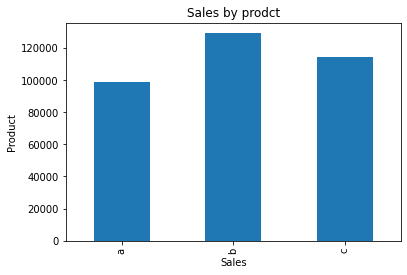

In [30]:
#сделаем для наглядности график по суммарным продажам продуктов категории а, б, с 
product_sales = sales_2022_concat_sales_2023.groupby('product')['sales'].sum()

product_sales.plot(kind='bar')
plt.title('Sales by prodct')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.show()

In [31]:
sales_2022_concat_sales_2023.to_csv('TEST_completed.csv')

In [32]:
sales_2022_concat_sales_2023.to_excel('TEST_completed.xlsx')

# Решение с применением SQL (sqlite)

In [33]:
#создаем временную БД в нашей памяти, подключаемся
conn = sqlite3.connect(':memory:')

sales.to_sql('sales', conn, index=False, if_exists='replace')

In [34]:
#первая строчка SUM возвращает сумму продаж до текущей даты для каждого продукта и года (группировка по дате - году)
#вторая строчка SUM суммарные продажи по продукту за каждый месяц
query = """
SELECT
    date,
    product,
    sales,
    SUM(sales) OVER (PARTITION BY product, strftime('%Y', date) ORDER BY date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS "sales YTD",
    SUM(sales) OVER (PARTITION BY product ORDER BY date ROWS BETWEEN 11 PRECEDING AND CURRENT ROW) AS "sales MAT"
FROM 
    sales
ORDER BY 
    date, product;
"""

In [35]:
sql_sales = pd.read_sql_query(query, conn)

sql_sales

,date,product,sales,sales YTD,sales MAT
0,2022-01-01 00:00:00,a,1979.0,1979.0,1979.0
1,2022-01-01 00:00:00,b,4195.0,4195.0,4195.0
2,2022-01-01 00:00:00,c,9879.0,9879.0,9879.0
3,2022-02-01 00:00:00,a,6416.0,8395.0,8395.0
4,2022-02-01 00:00:00,b,9905.0,14100.0,14100.0
...,...,...,...,...,...
58,2023-08-01 00:00:00,b,7706.0,41199.0,67430.0
59,2023-08-01 00:00:00,c,7454.0,51651.0,79637.0
60,2023-09-01 00:00:00,a,5182.0,41837.0,57300.0
61,2023-09-01 00:00:00,b,3363.0,44562.0,61063.0


In [36]:
sql_sales.loc[~sql_sales['product'].isin(check['product'])]

,date,product,sales,sales YTD,sales MAT


In [37]:
sql_sales.loc[~sql_sales['sales'].isin(check['sales'])]

,date,product,sales,sales YTD,sales MAT


In [38]:
sql_sales.loc[~sql_sales['sales YTD'].isin(check['sales YTD'])]

,date,product,sales,sales YTD,sales MAT


In [39]:
sql_sales.loc[~sql_sales['sales MAT'].isin(check['sales MAT'])]

,date,product,sales,sales YTD,sales MAT


In [40]:
len(sql_sales) == len(check)

True